# Traning Model for Prediction

Importing Required modules

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Reading Data

In [171]:
data = pd.read_csv("./Data/customer_purchase_data.csv")
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.14183,13,0,34.590743,0,5,1
1496,67,1,28775.33107,18,2,17.625707,0,1,1
1497,40,1,57363.24754,7,4,12.206033,0,0,0
1498,63,0,134021.77550,16,2,37.311634,1,0,1


In [172]:
x = data[data.columns[:-1]]
y = data["PurchaseStatus"]

## Pre-processing of Data

Looking for Outliers

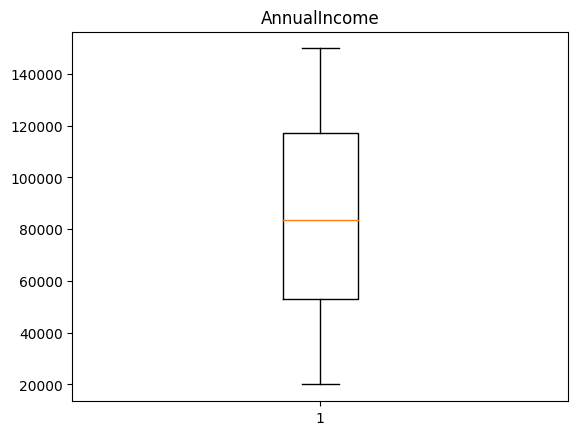

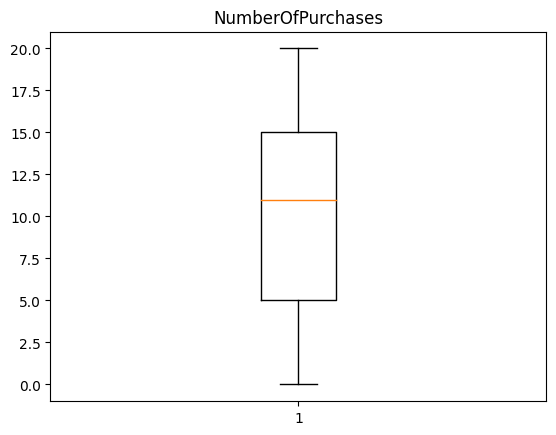

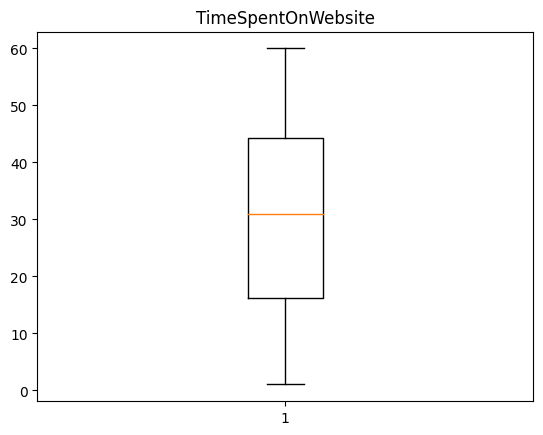

In [173]:
col = ["AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite"]
for i in col:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

## Performing PCA Feature Reduction

### Reation between Features (without PCA)

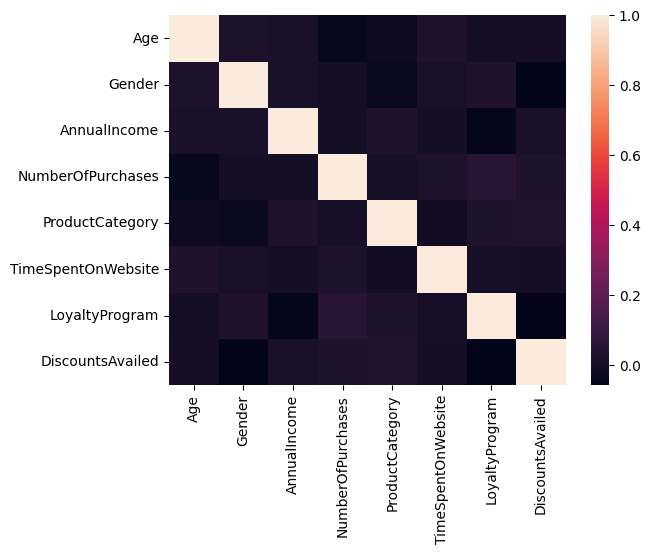

<Figure size 200x200 with 0 Axes>

In [261]:
x_mean = x.mean()
x_std = x.std()

z = (x-x_mean)/x_std
c = z.cov()
sns.heatmap(c)
plt.figure(figsize =(2, 2))
plt.savefig("Covarience matrix of Orginal Features")
plt.show()

In [175]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values: ', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:  [0.88243688 1.11358496 1.08527762 0.92779004 0.95377143 0.98591217
 1.03567238 1.01555452]
Eigen values Shape: (8,)
Eigen Vector Shape: (8, 8)


In [176]:
n=3
pca = PCA(n_components=n)
pca.fit(z)
x_pca = pca.transform(z)
x_pca = pd.DataFrame(x_pca,columns=[f"PC{i}" for i in range(1,n+1)])

### Reation between Features (with PCA)

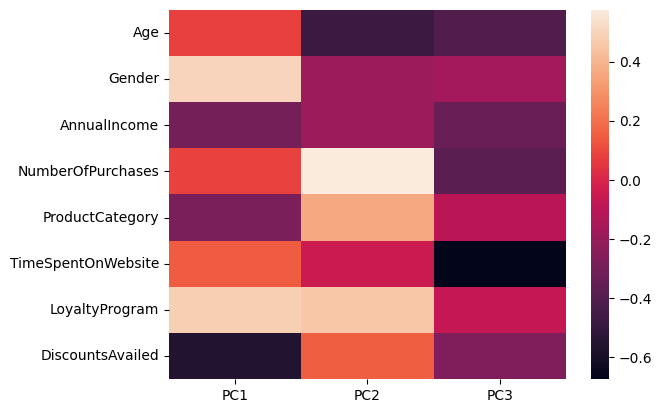

In [262]:
components = np.transpose(pca.components_)
pca_cov = pd.DataFrame(components,index=x.columns,columns=[f"PC{i}" for i in range(1,n+1)])
sns.heatmap(pca_cov)
plt.savefig("Covarience matrix of PCA Features")
plt.show()

## Splitting Data into Train & Test sets

### Without PCA

In [226]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=23)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


### With PCA

In [227]:
pca_xtrain,pca_xtest,pca_ytrain,pca_ytest = train_test_split(x_pca,y,test_size=0.2,random_state=23)

## Training Model

In [267]:
m = GaussianNB

## With PCA

### Training Model

In [246]:
model = m()
model.fit(pca_xtrain,pca_ytrain)


C:\Users\RAHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Testing Model

In [ ]:
pca_predicted = model.predict(pca_xtest)

### Accuracy

In [252]:
print(f"Accuracy = {metrics.accuracy_score(pca_ytest,pca_predicted)*100}")

Accuracy = 71.33333333333334


### Confusion Matrix

<Figure size 640x480 with 0 Axes>

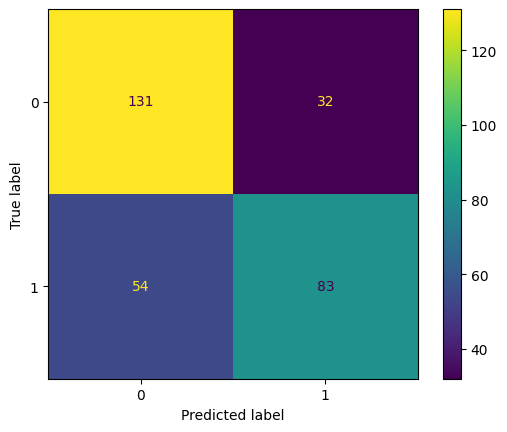

In [260]:
cm = metrics.confusion_matrix(pca_ytest,pca_predicted)
cmd = metrics.ConfusionMatrixDisplay(cm)
plt.savefig("Confusion Matrix with PCA")
cmd.plot()

## Without PCA

### Training Model

In [268]:
model2 = m()
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7933333333333333

### Testing Model

In [256]:
predicted = model2.predict(xtest)

### Accuracy

In [257]:
print(f"Accuracy = {metrics.accuracy_score(ytest,predicted)*100}")

Accuracy = 79.33333333333333


### Confusion Matrix

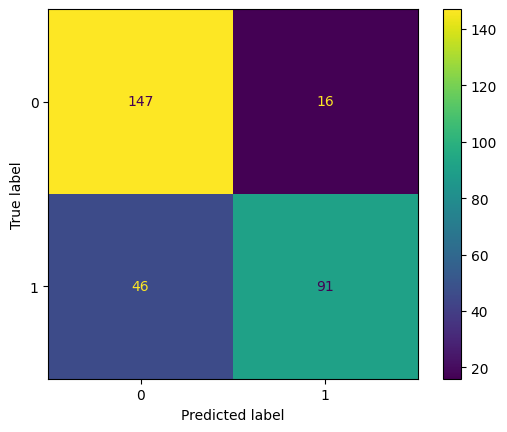

In [269]:
cm = metrics.confusion_matrix(ytest,predicted)
cmd = metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig("Confusion Matrix without PCA")